<a href="https://colab.research.google.com/github/ychaitanya0823/circular-economy-waste-management/blob/master/Agroaid_Majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow keras matplotlib numpy pandas flask


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


In [9]:
import os

# List uploaded files
print(os.listdir())


['.config', '.ipynb_checkpoints', 'archive.zip', 'sample_data']


In [13]:
!rm /content/archive.zip


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/PlantVillage/archive.zip'

with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/PlantVillage')

print("✅ Extraction complete!")


In [6]:
import os

dataset_path = "/content/PlantVillage"
print(os.listdir(dataset_path))


['PlantVillage']


In [9]:
for folder in os.listdir(dataset_path):
    print(f"{folder}: {len(os.listdir(os.path.join(dataset_path, folder)))} images")


PlantVillage: 2 images


In [11]:
!pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [12]:
import tensorflow as tf
from tensorflow import keras


In [13]:
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [14]:
import os

dataset_path = "/content/PlantVillage"

img_size = (256, 256)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class Names: ", class_names)


Found 54305 files belonging to 1 classes.
Using 43444 files for training.
Found 54305 files belonging to 1 classes.
Using 10861 files for validation.
Class Names:  ['PlantVillage']


In [3]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  []


In [5]:
img_size = (128, 128)  # Reduced from 256x256
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/PlantVillage"
    ,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/PlantVillage",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 54305 files belonging to 1 classes.
Using 43444 files for training.
Found 54305 files belonging to 1 classes.
Using 10861 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)


['PlantVillage']


In [8]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [10]:
model.compile(
    optimizer='adam',                # Optimizer (Adam works well for most deep learning tasks)
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']             # Evaluate performance using accuracy
)


In [11]:
history = model.fit(train_ds, validation_data=val_ds, epochs=2)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 607s 446ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/2
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 613s 451ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [12]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")


340/340 ━━━━━━━━━━━━━━━━━━━━ 45s 132ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Validation Accuracy: 0.00


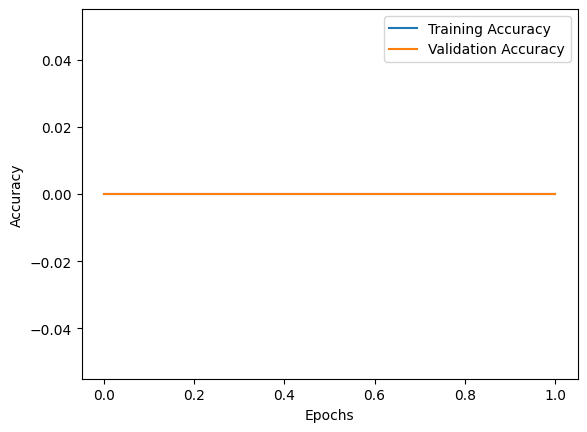

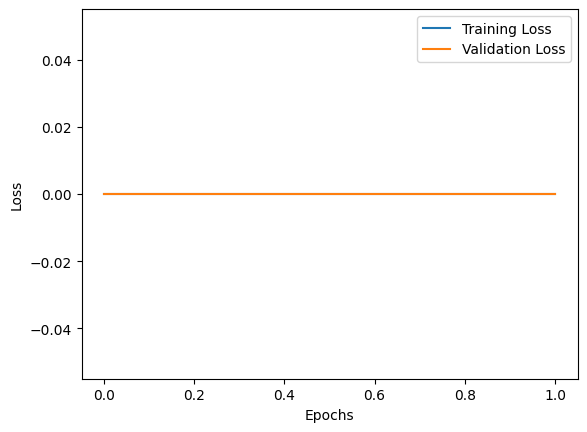

In [13]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
model.save('agroaid_model.h5')
print("Model saved successfully!")


Model saved successfully!


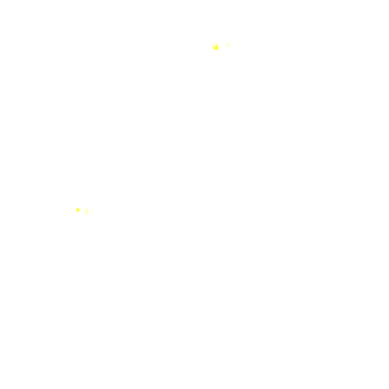

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Disease: PlantVillage
Actual Disease: PlantVillage


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the validation dataset
for images, labels in val_ds.take(1):
    sample_image = images[0].numpy()  # Take the first image
    sample_label = labels[0].numpy()  # True label
    break

# Display the image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

# Predict the class of the sample image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
prediction = model.predict(sample_image)

# Show predicted and actual labels
predicted_class = class_names[np.argmax(prediction)]
true_class = class_names[sample_label]

print(f"Predicted Disease: {predicted_class}")
print(f"Actual Disease: {true_class}")


In [23]:
import os

dataset_path = "/content/PlantVillage/PlantVillage"
print("Contents of the dataset:", os.listdir(dataset_path))


Contents of the dataset: ['val', 'train']


In [24]:
import tensorflow as tf

train_path = "/content/PlantVillage/PlantVillage/train"
val_path = "/content/PlantVillage/PlantVillage/val"

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(128, 128),
    batch_size=32
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=(128, 128),
    batch_size=32
)

# Confirm class names
class_names = train_ds.class_names
print("Detected Disease Classes:", class_names)


Found 43444 files belonging to 38 classes.
Found 10861 files belonging to 38 classes.
Detected Disease Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato__

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


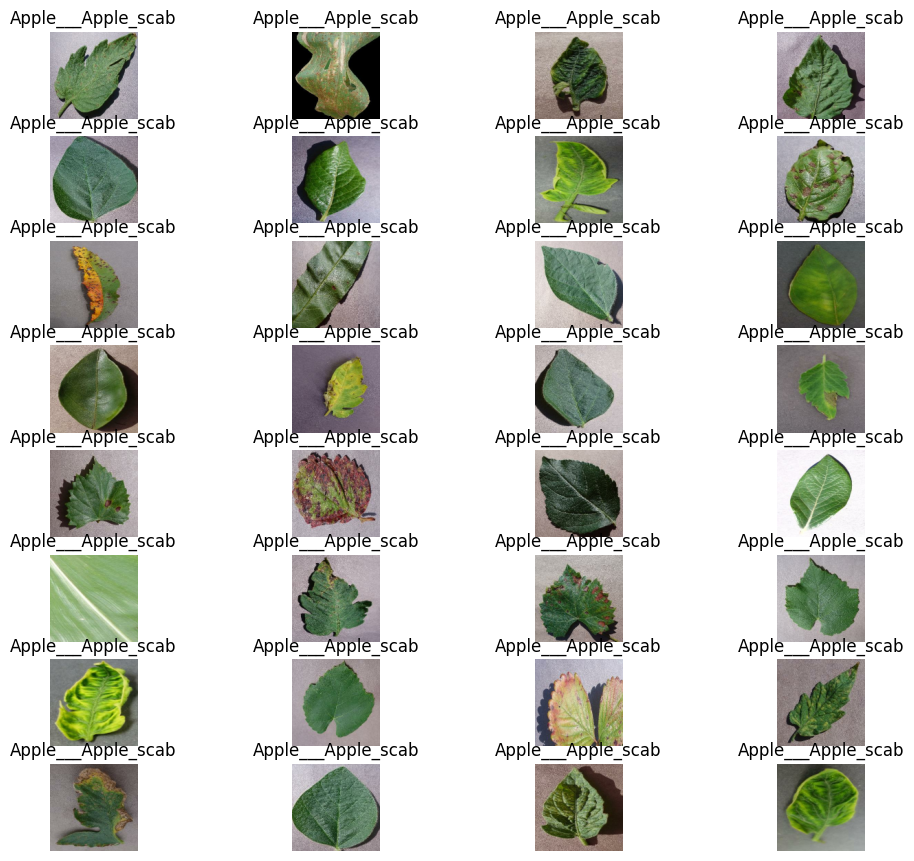

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Predict a batch of images from validation set
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = [class_names[np.argmax(pred)] for pred in predictions]

    # Calculate grid size dynamically
    num_images = len(images)
    rows = (num_images // 4) + 1  # Adjust rows based on batch size

    # Display images with predicted diseases
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(rows, 4, i + 1)  # Dynamically adjust rows
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(predicted_classes[i])
        plt.axis("off")
    plt.show()
